# 形态学转换
## 目标
- 学习不同的形态学操作，例如腐蚀(Erosion)，膨胀(Dilation)，开运算(Opening)，闭运算(Closing)等
- 我们要学习的函数有： cv2.erode()， cv2.dilate()， cv2.morphologyEx()等  

## 原理
- 形态学操作是根据图像形状进行的简单操作。一般情况下对二值化图像进行的操作。需要输入两个参数，一个是原始图像，第二个被称为结构化元素或、核，它是用来决定操作的性质的。两个基本的形态学操作是腐蚀和膨胀。他们的变体构成了开运算，闭运算，梯度等。我们会以下图为例逐一介绍它们。
- 形态学转换在图像中提取分量信息通常是图像最基本的形状特征，如在手写数字时，通常形态学运算得到其骨架信息，在具体识别时，针对其骨架进行运算即可，形态学运算在处理视觉检测，文字识别、医学图像处理、图像压缩编码等领域都有重要的应用

## 13.1 腐蚀（Erosion）
就像土壤侵蚀一样，这个操作会把前景物体的边界腐蚀掉（但是前景仍然是白色）。这是怎么做到的呢？卷积核沿着图像滑动，如果与卷积核对应的原图像的所有像素值都是 1，那么中心元素就保持原来的像素值，否则就变为零。这回产生什么影响呢？根据卷积核的大小靠近前景的所有像素都会被腐蚀掉（变为 0），所以前景物体会变小，整幅图像的白色区域会减少。这对于去除白噪声很有用，也可以用来断开两个连在一块的物体等。这里我们有一个例子，使用一个 5x5 的卷积核，其中所有的值都是1。让我们看看他是如何工作的：

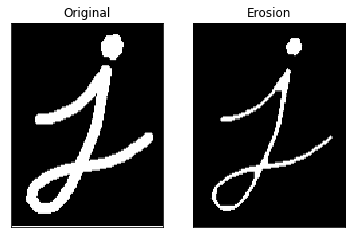

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)  # 3.迭代次数（次数越多会越细）

imageRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
erosionRGB = cv2.cvtColor(erosion,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(imageRGB),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosionRGB),plt.title('Erosion')
plt.xticks([]), plt.yticks([])
plt.show()

## 13.2 膨胀（Dilation）
与腐蚀相反，与卷积核(kernel)对应的原图像的像素值中只要有一个是 1，中心元
素的像素值就是 1。所以这个操作会增加图像中的白色区域（前景）。一般在去
噪声时先用腐蚀再用膨胀。因为腐蚀在去掉白噪声的同时，也会使前景对象变
小。所以我们再对他进行膨胀。这时噪声已经被去除了，不会再回来了，但是
前景还在并会增加。膨胀也可以用来连接两个分开的物体。

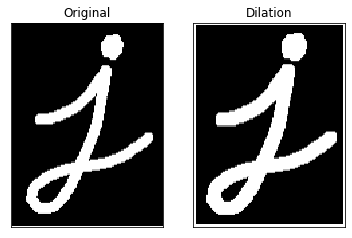

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('j.png',0)
kernel = np.ones((3,3),np.uint8)

dilation = cv2.dilate(img,kernel,iterations = 1)

imageRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
dilationRGB = cv2.cvtColor(dilation,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(imageRGB),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilationRGB),plt.title('Dilation')
plt.xticks([]), plt.yticks([])
plt.show()

## 13.3 开运算（Opening）
先进性腐蚀再进行膨胀就叫做开运算。就像我们上面介绍的那样，它被用来去除噪声。这里我们用到的函数是 cv2.morphologyEx()。  
dst = open(src,element) = dilate(erode(src,element),element)

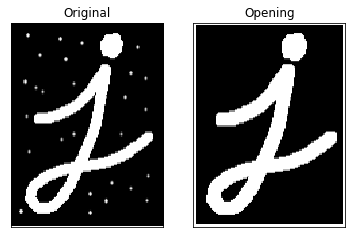

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('mpl_j.png',0)
kernel = np.ones((3,3),np.uint8)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

imageRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
openingRGB = cv2.cvtColor(dilation,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(imageRGB),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(openingRGB),plt.title('Opening')
plt.xticks([]), plt.yticks([])
plt.show()

## 13.4 闭运算（Closing）
先膨胀再腐蚀。它经常被用来填充前景物体中的小洞，或者前景物体上的小黑点  
dst = close(src,element) = erode(dilate(src,element),element)

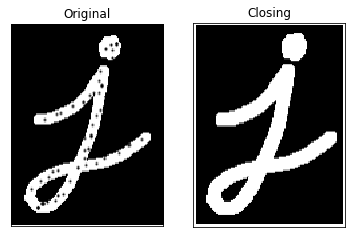

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('clo_j.png',0)
kernel = np.ones((3,3),np.uint8)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

imageRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
closingRGB = cv2.cvtColor(dilation,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(imageRGB),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closingRGB),plt.title('Closing')
plt.xticks([]), plt.yticks([])
plt.show()

## 13.5 形态学梯度（Morphological Gradient）
其实就是一幅图像膨胀与腐蚀的差别。结果看上去就像前景物体的轮廓。  
dst = morph_grad(src,element) = dilate(src,element)-erode(src,element)

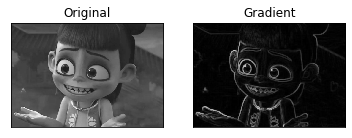

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# img = cv2.imread('j.png',0)
img = cv2.imread('nazha.jpeg',0)
kernel = np.ones((5,5),np.uint8)

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

imageRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gradientRGB = cv2.cvtColor(gradient,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(imageRGB),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gradientRGB),plt.title('Gradient')
plt.xticks([]), plt.yticks([])
plt.show()

## 13.6 礼帽（Top Hat）
原始图像与进行开运算之后得到的图像的差。可以获得原始图像的噪声信息，或者获得比原始图像的边缘更亮的信息  
dst = tophat(src,element) = src-open(src,element)  
下面的例子是用一个 9x9 的核进行礼帽操作的结果

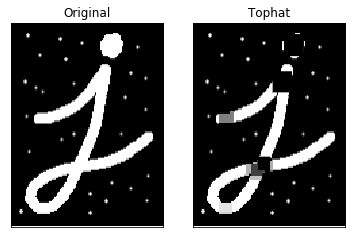

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('mpl_j.png',0)
kernel = np.ones((9,9),np.uint8)

tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

imageRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
tophatRGB = cv2.cvtColor(tophat,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(imageRGB),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(tophatRGB),plt.title('Tophat')
plt.xticks([]), plt.yticks([])
plt.show()

## 13.7 黑帽（Black Hat）
进行闭运算之后得到的图像与原始图像的差。  
dst = blackhat(src,element) = close(src,element)-src

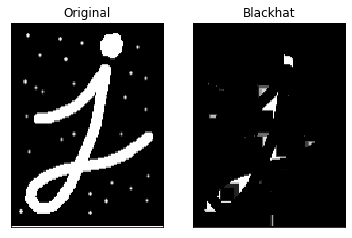

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('mpl_j.png',0)
kernel = np.ones((9,9),np.uint8)

blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

imageRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
blackhatRGB = cv2.cvtColor(blackhat,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(imageRGB),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blackhatRGB),plt.title('Blackhat')
plt.xticks([]), plt.yticks([])
plt.show()


## <font color=blue>结构化元素</font>
在前面的例子中我们使用 Numpy 构建了结构化元素，它是正方形的。但
有时我们需要构建一个椭圆形/圆形的核。为了实现这种要求，提供了 OpenCV
函数 cv2.getStructuringElement(shape,ksize[,anchor])。你只需要告诉他你需要的核的形状
和大小。
- shape:形状类型
    - cv2.MORPH_RECT
    - cv2.MORPH_ELLIPSE
    - cv2.MORPH_CROSS
- ksize:结构元素大小
- anchor:默认（-1，-1）为形状的中心

In [29]:
# Rectangular Kernel 矩形结构
array_rect= cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

# Elliptical Kernel  椭圆结构
array_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

# Cross-shaped Kernel  十字结构
array_cross = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
print(array_ellipse)

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
